<a href="https://colab.research.google.com/github/Noble-Lab/casanovo_asms2023/blob/main/Casanovo_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

* Use `pip` to easily install the latest version of Casanovo.

In [ ]:
!pip install casanovo

* Use `pip` to easily install the latest version of Casanovo.After installation, test that it was successful by viewing the Casanovo command line interface help:

In [ ]:
!casanovo --help

## Sequence new mass spectra


* Download a sample MGF file with 1 MS/MS spectra

In [ ]:
!wget https://noble.gs.washington.edu/~melih/one_psm.mgf

In [ ]:
# You can preview the MGF with this:
! cat one_psm.mgf

* To sequence your own mass spectra with Casanovo, use the `denovo` mode. 
* Just provide the spectra file (in mzML, mzXML, or MGF format) and path for peptide predictions in the mzTab format.

In [ ]:
!casanovo --mode=denovo --peak_path=one_psm.mgf --output=sample_output.mztab

# Don't worry about the printed warnings, we will resolve/suppress those in future releases.

* You will see a log file and the mzTab output file created in the directory where Casanovo was run.
* mzTab files list predicted peptides,their identifiers and confidence scores in tab-delimited format.

In [ ]:
! cat sample_output.mztab

***PRO TIP:*** `pandas` DataFrames can be used to open and view mzTab files.

In [ ]:
 import pandas as pd

mztab_filename = "sample_output.mztab"
with open(mztab_filename) as f_in:
    for skiprows, line in enumerate(f_in):
        if line.startswith("PSH"):
            break
            
mzt_df = pd.read_csv(mztab_filename, skiprows=skiprows, sep="\t")
mzt_df

Here are some of the most important columns in the mzTab file:
*   `sequence` -> predicted peptide sequence
*   `PSM_ID` -> Index of the PSM within spectrum file
*   `search_engine_score[1]` -> Peptide-level confidence score
*   `opt_ms_run[1]_aa_scores[1]` -> Amino acid-level confidence scores




In [ ]:
mzt_df[["sequence","PSM_ID","search_engine_score[1]","spectra_ref","opt_ms_run[1]_aa_scores"]]

* There are two other options you may want to add when sequencing new spectra with Casanovo:
>* 1 - Use a different set of pre-trained model weights, e.g. `--model=/path/to/pretrained/weights.ckpt`
>* 2 - Use a different configuration, e.g. `--config=/path/to/config.yaml`

* A sample command would look like:
> `casanovo --mode=denovo --model=casanovo_massivekb.ckpt --peak_path=one_psm.mgf --config=custom_config.yaml --output=one_psm_output.mztab`

***PRO TIP:*** You can sequence spectra from multiple input files by indicating 
 `--peak_path=*.mgf`

In [ ]:
# You can download the config file with this:
! wget https://noble.gs.washington.edu/~melih/custom_config.yaml

# You can preview the config file with "! cat custom_config.yaml"

In the config file, there are 6 options marked with (I) that you may want to change when sequencing new spectra with Casanovo:

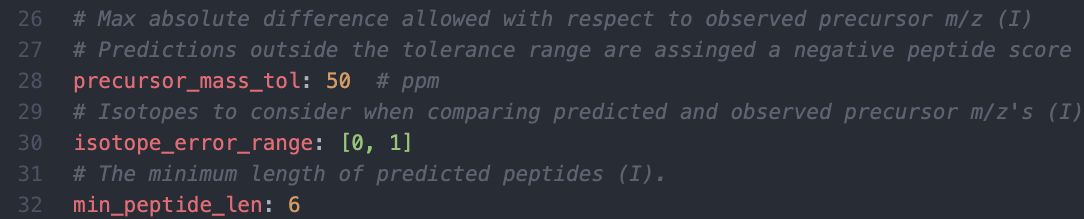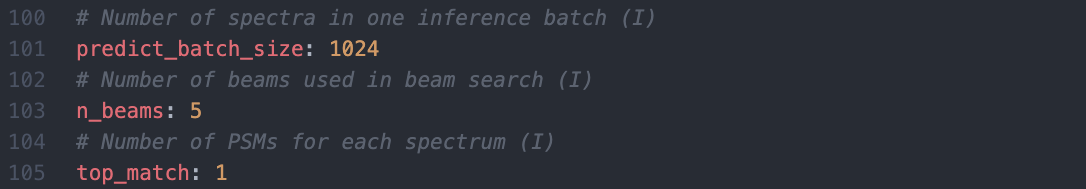

Let's download a spectrum file from MassIVE and run casanovo on it:

In [ ]:
! wget ftp://massive.ucsd.edu/MSV000090982/peak/Mus-musculus/CoAN141217_450_3595.mgf

In [ ]:
! casanovo --mode=denovo --peak_path=CoAN141217_450_3595.mgf --output=massive_output.mztab

## Train a new model

* To train a model from scratch, ground truth peptide labels must be provided for training and validation spectra, e.g. SEQ field in an MGF file.
* Command to run:


```
casanovo --mode=train --peak_path=one_psm.mgf  --peak_path_val=one_psm.mgf --config=custom_config.yaml
```




* In the config file, you can set the path to model weights chekpointed during training

* You can also fine-tune a previously trained model with your own data, specify the starting model weights using `--model` and set `train_from_scratch: False` in the config file.

* A sample command would look like:
> `casanovo --mode=train --model=casanovo_massivekb.ckpt --peak_path=one_psm.mgf  --peak_path_val=one_psm.mgf --config=custom_config.yaml`

When training Casanovo, there are more options on the config file you may want to change. Some of the important ones are marked with green arrows:

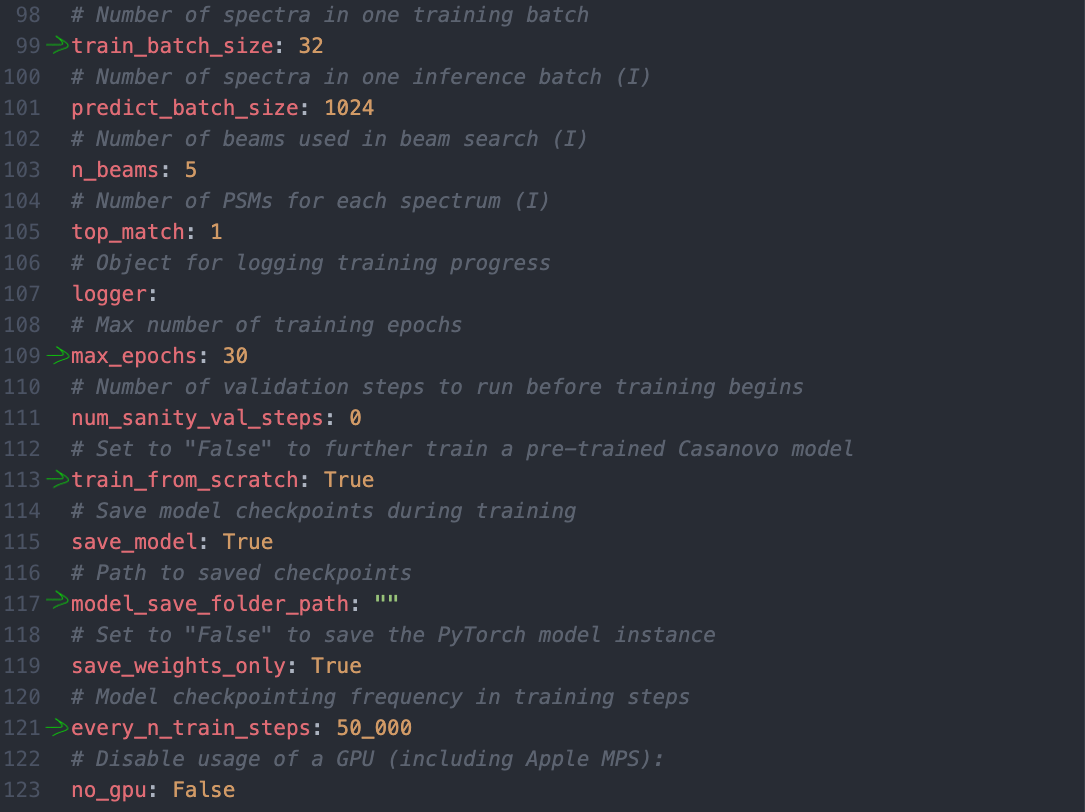